<a href="https://colab.research.google.com/github/bsshreesha/Physics_Informed_Neural_Network/blob/main/Integral_Small.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re

In [2]:
# -----------------------------
# User-supplied differential equations
# -----------------------------
equations = {
    r"dy/dx = x**2": lambda x: x**2,
    r"dy/dx = sin(x)": lambda x: tf.sin(x),
    r"dy/dx = 1/x": lambda x: 1/x,
    r"dy/dx = exp(x)": lambda x: tf.exp(x),
    r"dy/dx = cos(x)**2": lambda x: tf.cos(x)**2,
    r"dy/dx = 3*x**2 + 2*x + 1": lambda x: 3*x**2 + 2*x + 1,
    r"dy/dx = log(x)": lambda x: tf.math.log(x),
    r"dy/dx = 1 / (1 + x**2)": lambda x: 1 / (1 + x**2)
}

In [6]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  # <-- fixed this line
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(32, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    return model

In [7]:
# -----------------------------
# Loss function using autograd
# -----------------------------
def compute_loss(model, x, rhs_func):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = model(x)
    dy_dx = tape.gradient(y, x)
    residual = dy_dx - rhs_func(x)
    return tf.reduce_mean(tf.square(residual))

# -----------------------------
# Training loop
# -----------------------------
def train(model, x, rhs_func, epochs=1000, lr=0.001):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            loss = compute_loss(model, x, rhs_func)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.numpy():.6f}")
    return model


Training for: dy/dx = x**2
Epoch 0, Loss: 0.163520


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential/dense_2/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.017535
Epoch 200, Loss: 0.002323
Epoch 300, Loss: 0.000738
Epoch 400, Loss: 0.000622
Epoch 500, Loss: 0.000517
Epoch 600, Loss: 0.000418
Epoch 700, Loss: 0.000326
Epoch 800, Loss: 0.000240
Epoch 900, Loss: 0.000161


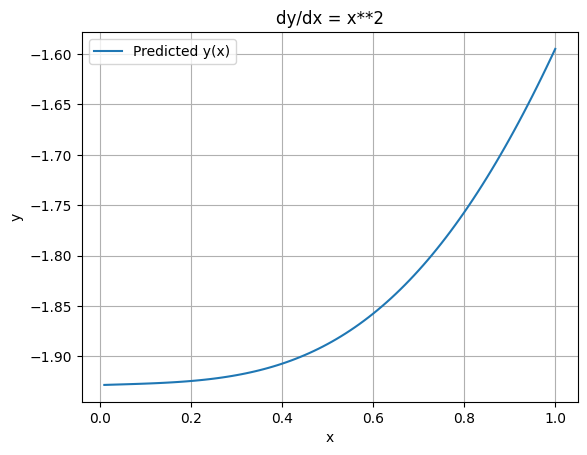


Training for: dy/dx = sin(x)
Epoch 0, Loss: 0.097494


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_1/dense_5/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.000163
Epoch 200, Loss: 0.000152
Epoch 300, Loss: 0.000142
Epoch 400, Loss: 0.000132
Epoch 500, Loss: 0.000122
Epoch 600, Loss: 0.000112
Epoch 700, Loss: 0.000102
Epoch 800, Loss: 0.000092
Epoch 900, Loss: 0.000083


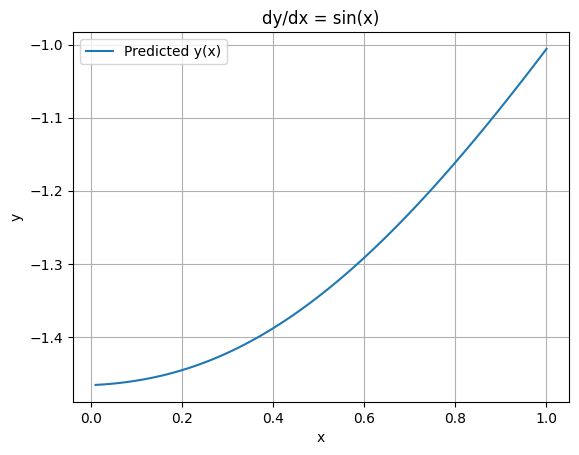


Training for: dy/dx = 1/x
Epoch 0, Loss: 163.369583


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_2/dense_8/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 116.273056
Epoch 200, Loss: 78.249466
Epoch 300, Loss: 51.379025
Epoch 400, Loss: 34.168877
Epoch 500, Loss: 22.274456
Epoch 600, Loss: 14.303048
Epoch 700, Loss: 9.424153
Epoch 800, Loss: 6.390450
Epoch 900, Loss: 4.392779


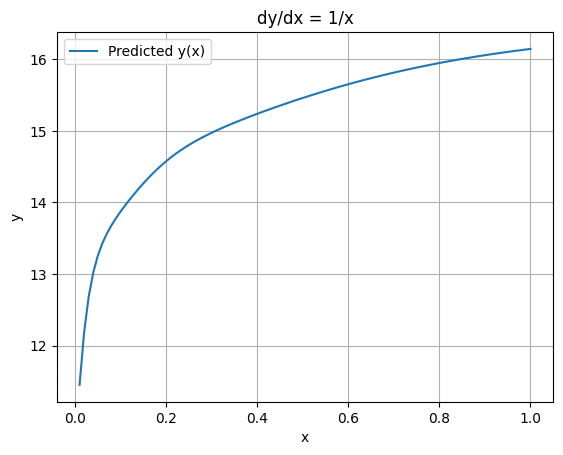


Training for: dy/dx = exp(x)
Epoch 0, Loss: 4.233181


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_3/dense_11/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.272040
Epoch 200, Loss: 0.140272
Epoch 300, Loss: 0.032022
Epoch 400, Loss: 0.004192
Epoch 500, Loss: 0.002965
Epoch 600, Loss: 0.002382
Epoch 700, Loss: 0.001911
Epoch 800, Loss: 0.001525
Epoch 900, Loss: 0.001206


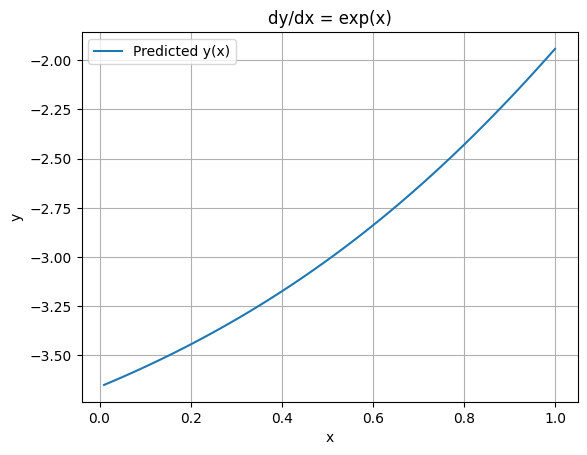


Training for: dy/dx = cos(x)**2
Epoch 0, Loss: 1.436185


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_4/dense_14/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.014980
Epoch 200, Loss: 0.004690
Epoch 300, Loss: 0.001992
Epoch 400, Loss: 0.001213
Epoch 500, Loss: 0.000668
Epoch 600, Loss: 0.000337
Epoch 700, Loss: 0.000184
Epoch 800, Loss: 0.000129
Epoch 900, Loss: 0.000109


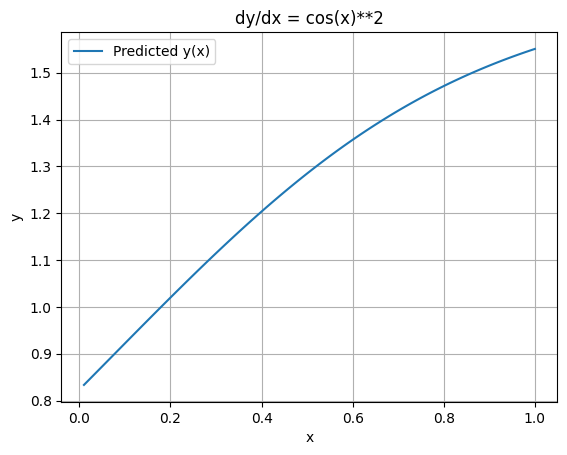


Training for: dy/dx = 3*x**2 + 2*x + 1
Epoch 0, Loss: 11.697369


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_5/dense_17/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 2.110330
Epoch 200, Loss: 0.952334
Epoch 300, Loss: 0.055557
Epoch 400, Loss: 0.006358
Epoch 500, Loss: 0.004705
Epoch 600, Loss: 0.003852
Epoch 700, Loss: 0.003279
Epoch 800, Loss: 0.002826
Epoch 900, Loss: 0.002443


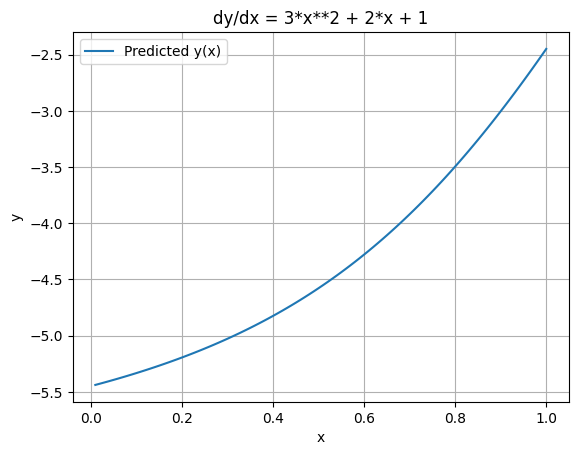


Training for: dy/dx = log(x)
Epoch 0, Loss: 2.507205


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_6/dense_20/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.555322
Epoch 200, Loss: 0.120888
Epoch 300, Loss: 0.059977
Epoch 400, Loss: 0.044254
Epoch 500, Loss: 0.034451
Epoch 600, Loss: 0.027703
Epoch 700, Loss: 0.022923
Epoch 800, Loss: 0.019258
Epoch 900, Loss: 0.016056


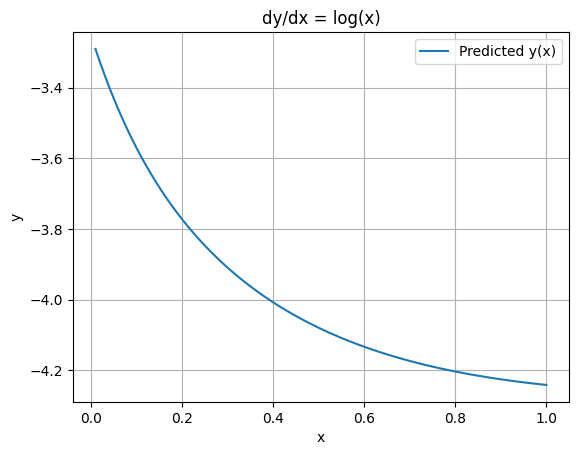


Training for: dy/dx = 1 / (1 + x**2)
Epoch 0, Loss: 1.014395


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['sequential_7/dense_23/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


Epoch 100, Loss: 0.001184
Epoch 200, Loss: 0.000047
Epoch 300, Loss: 0.000010
Epoch 400, Loss: 0.000010
Epoch 500, Loss: 0.000010
Epoch 600, Loss: 0.000010
Epoch 700, Loss: 0.000010
Epoch 800, Loss: 0.000009
Epoch 900, Loss: 0.000009


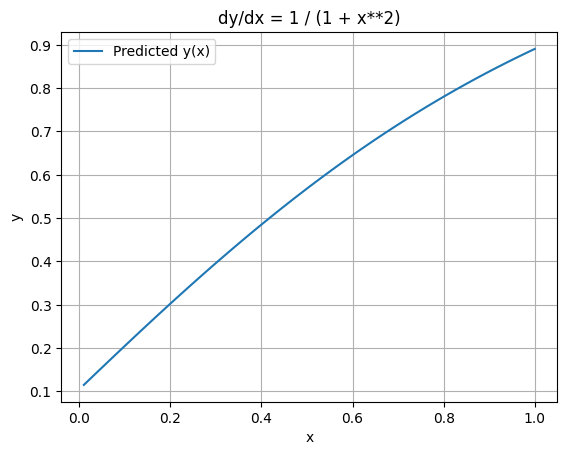

In [8]:
# -----------------------------
# Plot solution
# -----------------------------
def plot_solution(model, x, title):
    y_pred = model(x)
    plt.plot(x, y_pred, label='Predicted y(x)')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

# -----------------------------
# Main Loop Over All Equations
# -----------------------------
for eq_text, rhs_func in equations.items():
    print(f"\nTraining for: {eq_text}")

    # Define x domain
    x_train = tf.convert_to_tensor(np.linspace(0.01, 1, 100).reshape(-1, 1), dtype=tf.float32)  # avoid log(0) or 1/0

    # Create and train the model
    model = create_model()
    model = train(model, x_train, rhs_func, epochs=1000)

    # Plot results
    plot_solution(model, x_train, title=eq_text)